In [1]:
import os
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
data_dir = 'data'

In [3]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.15,
    fill_mode='nearest',
    validation_split=0.2
)

In [4]:
train_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size=16,
    subset='training',
    target_size=(256, 256),
    class_mode='binary'
)

Found 818 images belonging to 2 classes.


In [5]:
val_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size=16,
    subset='validation',
    target_size=(256, 256),
    class_mode='binary'
)

Found 203 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,       
    restore_best_weights=True
)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, batch_size=16, epochs=25, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/25
52/52 [==============================] - 35s 659ms/step - loss: 2.3587 - accuracy: 0.5990 - val_loss: 0.6127 - val_accuracy: 0.6650
Epoch 2/25
52/52 [==============================] - 37s 709ms/step - loss: 0.5271 - accuracy: 0.7335 - val_loss: 0.5565 - val_accuracy: 0.7340
Epoch 3/25
52/52 [==============================] - 37s 707ms/step - loss: 0.4884 - accuracy: 0.7922 - val_loss: 0.5170 - val_accuracy: 0.7586
Epoch 4/25
52/52 [==============================] - 37s 711ms/step - loss: 0.4398 - accuracy: 0.8056 - val_loss: 0.4509 - val_accuracy: 0.8227
Epoch 5/25
52/52 [==============================] - 37s 709ms/step - loss: 0.4028 - accuracy: 0.8399 - val_loss: 0.5031 - val_accuracy: 0.7980
Epoch 6/25
52/52 [==============================] - 37s 710ms/step - loss: 0.3870 - accuracy: 0.8374 - val_loss: 0.4657 - val_accuracy: 0.8079
Epoch 7/25
52/52 [==============================] - 37s 710ms/step - loss: 0.4169 - accuracy: 0.8337 - val_loss: 0.4455 - val_accuracy: 0.8227

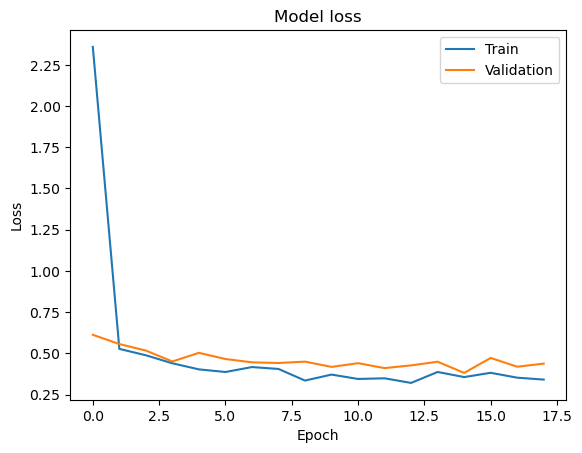

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


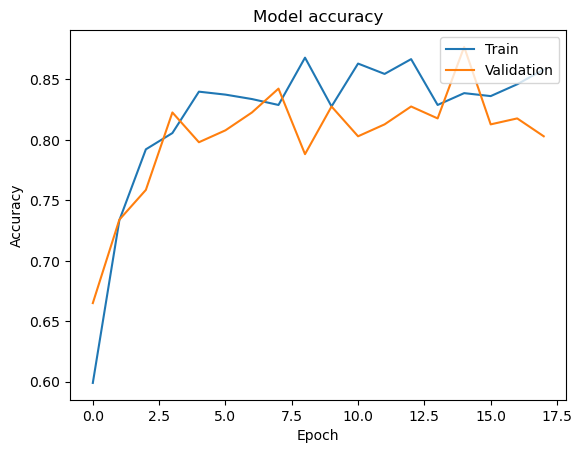

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
model.save('model.keras')

In [15]:
del model

In [16]:
from tensorflow.keras.models import load_model

In [17]:
model = load_model('model.keras')

In [18]:
import numpy as np

In [25]:
def get_prediction(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = img/255
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    prediction_class = 1 if pred >= 0.5 else 0
    if prediction_class == 0:
        return 'parrot'
    else:
        return 'sparrow'

1/1 [==============================] - 0s 39ms/step


'parrot'

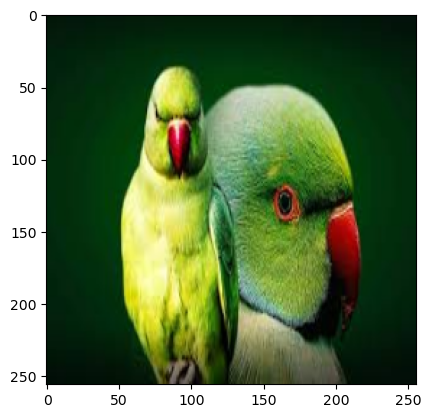

In [26]:
get_prediction(r'test_images/img_1.jpeg')

In [24]:
train_generator.class_indices

{'parrot': 0, 'sparrow': 1}

1/1 [==============================] - 0s 30ms/step


'parrot'

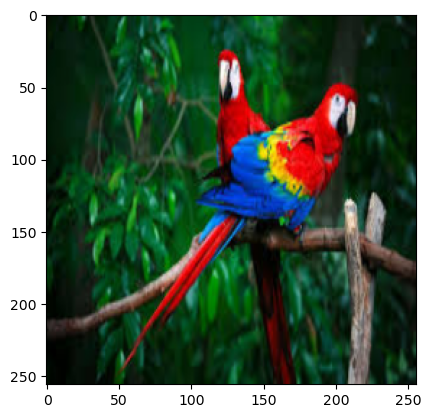

In [27]:
get_prediction(r'test_images/img_2.jpeg')

1/1 [==============================] - 0s 37ms/step


'sparrow'

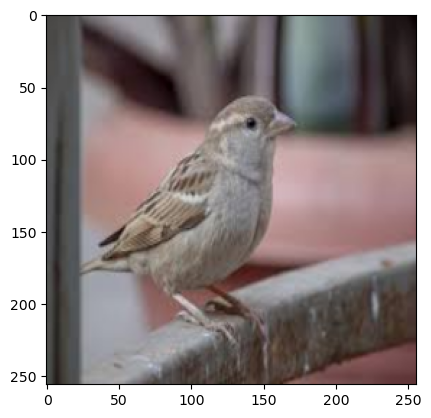

In [29]:
get_prediction(r'test_images/img_3.jpeg')

1/1 [==============================] - 0s 37ms/step


'sparrow'

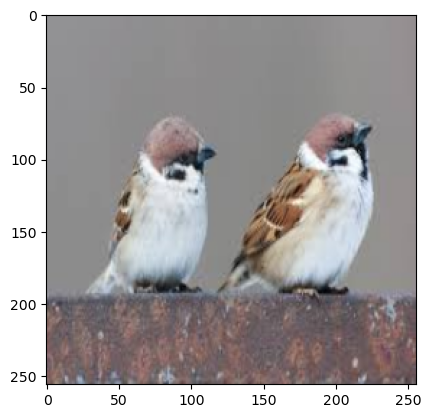

In [39]:
get_prediction(r'test_images/img_4.jpeg')